# Problem 4
## Problem 8 from Chapter 5

We will now perform cross-validation on a simulated data set.

In [27]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
import statsmodels.api as sm

## Part A
Generate a simulated data set as follows:
```
set.seed(1)
x=rnorm(100)
y=x-2*x^2+rnorm (100)
```
In this data set, what is n and what is p? Write out the model
used to generate the data in equation form.

In [28]:
random.seed(1)
x = np.random.randn(100)
y = (x-(2*(x*x)) + np.random.randn(100))
B0 = np.ones(100)

N is number of samples and in this case it is 100. P is number of predictors and equal to 1 in this case

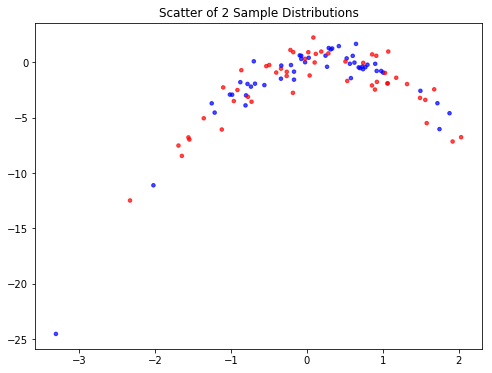

In [29]:
## creating a scatter plto
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
_ = ax.scatter(x, y, alpha=0.7, s=50, color = ['red','blue'], marker= '.')
_ = plt.title('Scatter of 2 Sample Distributions', FontSize=12)
#_ = plt.legend(loc=, prop={'size' : 12})
_ = plt.show()

## Part B
Create a scatterplot of X against Y . Comment on what you find.

X and Y are highly correlated. y is simply shift of x with added gaussian noise

## Part C
Set a random seed, and then compute the LOOCV errors that
result from fitting the following four models using least squares:<br>
$i. Y = \beta_0 + \beta_1 X $<br>
$ii. Y = \beta_0 + \beta_1 X + \beta_2 X^2$<br>
$iii. Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3$<br>
$iv. Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \beta_4 X^4$<br>
Note you may find it helpful to use the data.frame() function
to create a single data set containing both X and Y .

In [30]:
# Getting leave one out and linear regression model
loo = LeaveOneOut()
clf = LinearRegression()

# Creating copies of the original data for local use
x_copy =x
y_copy =y

# Creating arrays with power 2,3,4 of x to use in models 2,3,4
x_2 = np.power(x_copy, 2)
x_3 = np.power(x_copy, 3)
x_4 = np.power(x_copy, 4)

### Part i.

In [31]:
# Benerating a data frame from generated data
# creating dictionary to generate data frame
# B0 is simply a column of ones
dict_data = {'B0':B0,
        'x':x_copy,     
       'y':y_copy}
dataset_1 = pd.DataFrame(dict_data)

In [32]:
# This function takes in test and train indexes,splits data into train and test,
# and calculates mean squared error and appends it to score
scores_1 = []
def calc_mse_1(train_index, test_index):
    train = dataset_1.loc[train_index]
    test = dataset_1.loc[test_index]
    X_train = train[['B0','x']]#.values.reshape(-1,1)
    y_train = train['y']
    X_test = test[['B0','x']]#.values.reshape(-1,1)
    y_test = test['y']
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    error = mse(pred,y_test)
    scores_1.append(error)
    
# Splits data set into train and test leaving one out and repeats n times
for train_index, test_index in loo.split(dataset_1):
    calc_mse_1(train_index, test_index)

scores_1 = np.asarray(scores_1)
mean_1 = np.mean(scores_1)

print("Mean of the scores with 1 degrees of freedom is {}".format(mean_1))

Mean of the scores with 1 degrees of freedom is 11.14681456827608


In [33]:
## split dataset into y and X and compute statistical significance of the coefs using statsmodel

X_1 = dataset_1[['B0','x']]
y_1 = dataset_1['y']


model_1 = sm.OLS(y_1, X_1)
results_1 = model_1.fit()
print(results_1.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     25.29
Date:                Mon, 26 Feb 2018   Prob (F-statistic):           2.23e-06
Time:                        14:02:12   Log-Likelihood:                -255.99
No. Observations:                 100   AIC:                             516.0
Df Residuals:                      98   BIC:                             521.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
B0            -2.0823      0.317     -6.566      0.0

### Part ii.

In [34]:
# Creating dictionary to generate data frame
# B0 is simply a column of ones
dict_data = {'B0':B0,
             'x':x_copy,
            'x^2':x_2,
             'y':y_copy}
dataset_2 = pd.DataFrame(dict_data)

In [35]:
# This function takes in test and train indexes,splits data into train and test,
# and calculates mean squared error and appends it to score
scores_2 = []
def calc_mse_2(train_index, test_index):
    train = dataset_2.loc[train_index]
    test = dataset_2.loc[test_index]
    X_train = train[['B0','x','x^2']]
    y_train = train['y']
    X_test = test[['B0','x','x^2']]
    y_test = test['y']
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    error = mse(pred,y_test)
    scores_2.append(error)
    
# Splits data set into train and test leaving one out and repeats n times
for train_index, test_index in loo.split(dataset_2):
    calc_mse_2(train_index, test_index)

scores_2 = np.asarray(scores_2)
mean_2 = np.mean(scores_2)

print("Mean of the scores with 2 degrees of freedom is {}".format(mean_2))

Mean of the scores with 2 degrees of freedom is 1.0678843695488707


In [36]:
## split dataset into y and X and compute statistical significance of the coefs using statsmodel
X_2 = dataset_2[['B0','x','x^2']]
y_2 = dataset_2['y']


model_2 = sm.OLS(y_2, X_2)
results_2 = model_2.fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     564.8
Date:                Mon, 26 Feb 2018   Prob (F-statistic):           3.60e-54
Time:                        14:02:13   Log-Likelihood:                -140.61
No. Observations:                 100   AIC:                             287.2
Df Residuals:                      97   BIC:                             295.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
B0             0.0424      0.123      0.344      0.7

### Part iii.

In [37]:
# Creating dictionary to generate data fram
# B0 is simply a column of ones
dict_data = {'B0':B0,
             'x':x_copy,
             'x^2':x_2,
             'x^3':x_3,
             'y':y_copy}
dataset_3 = pd.DataFrame(dict_data)

In [38]:
# This function takes in test and train indexes,splits data into train and test,
# and calculates mean squared error and appends it to score
scores_3 = []
def calc_mse_3(train_index, test_index):
    train = dataset_3.loc[train_index]
    test = dataset_3.loc[test_index]
    X_train = train[['B0','x','x^2','x^3']]
    y_train = train['y']
    X_test = test[['B0','x','x^2','x^3']]
    y_test = test['y']
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    error = mse(pred,y_test)
    scores_3.append(error)
    
# Splits data set into train and test leaving one out and repeats n times
for train_index, test_index in loo.split(dataset_3):
    calc_mse_3(train_index, test_index)

scores_3 = np.asarray(scores_3)
mean_3 = np.mean(scores_3)

print("Mean of the scores with 3 degrees of freedom is {}".format(mean_3))

Mean of the scores with 3 degrees of freedom is 0.9965573529301355


In [39]:
## split dataset into y and X and compute statistical significance of the coefs using statsmodel
X_3 = dataset_3[['B0','x','x^2','x^3']]
y_3 = dataset_3['y']


model_3 = sm.OLS(y_3, X_3)
results_3 = model_3.fit()
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     392.9
Date:                Mon, 26 Feb 2018   Prob (F-statistic):           9.35e-54
Time:                        14:02:13   Log-Likelihood:                -138.17
No. Observations:                 100   AIC:                             284.3
Df Residuals:                      96   BIC:                             294.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
B0             0.1219      0.126      0.964      0.3

### Part iv.

In [40]:
# Creating dictionary to generate data fram
dict_data = {'B0':B0,
             'x':x_copy,
             'x^2':x_2,
             'x^3':x_3,
             'x^4':x_4,
             'y':y_copy}
dataset_4 = pd.DataFrame(dict_data)

In [41]:
## this function takes in test and train indexes,splits data into train and test,
## and calculates mean squared error and appends it to score
scores_4 = []
def calc_mse_4(train_index, test_index):
    train = dataset_4.loc[train_index]
    test = dataset_4.loc[test_index]
    X_train = train[['B0','x','x^2','x^3','x^4']]
    y_train = train['y']
    X_test = test[['B0','x','x^2','x^3','x^4']]
    y_test = test['y']
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    error = mse(pred,y_test)
    scores_4.append(error)
    
## splits data set into train and test leaving one out and repeats n times
for train_index, test_index in loo.split(dataset_4):
    calc_mse_4(train_index, test_index)

scores_4 = np.asarray(scores_4)
mean_4 = np.mean(scores_4)

print("Mean of the scores with 4 degrees of freedom is {}".format(mean_4))

Mean of the scores with 4 degrees of freedom is 1.1941575019349997


In [42]:
## split dataset into y and X and compute statistical significance of the coefs using statsmodel
X_4 = dataset_4[['B0','x','x^2','x^3','x^4']]
y_4 = dataset_4['y']


model_4 = sm.OLS(y_4, X_4)
results_4 = model_4.fit()
print(results_4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     291.7
Date:                Mon, 26 Feb 2018   Prob (F-statistic):           2.00e-52
Time:                        14:02:13   Log-Likelihood:                -138.16
No. Observations:                 100   AIC:                             286.3
Df Residuals:                      95   BIC:                             299.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
B0             0.1321      0.143      0.922      0.3

## Part D
Repeat (c) using another random seed, and report your results.
Are your results the same as what you got in (c)? Why?

In [43]:
# Generating a new distribution with a random seed
# _n after a variable name refers to coming from this new distribution

random.seed(np.random.randint(10,100))
x_n = np.random.randn(100)
y_n = (x_n-(2*(x_n*x_n)) + np.random.randn(100))

In [44]:
# Creating copies of the original data for local use
x_copy_n = x_n
y_copy_n = y_n

# Creating arrays with power 2,3,4 of x to use in models 2,3,4
x_2_n = np.power(x_copy_n, 2)
x_3_n = np.power(x_copy_n, 3)
x_4_n = np.power(x_copy_n, 4)

# using same loo and linearregression model obtained in part c

### Part i.

In [45]:
# Generating a data frame from generated data
# creating dictionary to generate data frame
dict_data = {'B0':B0,
             'x':x_copy_n,
            'y':y_copy_n}
dataset_1_n = pd.DataFrame(dict_data)

In [46]:
## This function takes in test and train indexes,splits data into train and test,
## and calculates mean squared error and appends it to score
scores_1_n = []
def calc_mse_1_n(train_index, test_index):
    train = dataset_1_n.loc[train_index]
    test = dataset_1_n.loc[test_index]
    X_train = train[['B0','x']]
    y_train = train['y']
    X_test = test[['B0','x']]
    y_test = test['y']
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    error = mse(pred,y_test)
    scores_1_n.append(error)
    
## splits data set into train and test leaving one out and repeats n times
for train_index, test_index in loo.split(dataset_1_n):
    calc_mse_1_n(train_index, test_index)

scores_1_n = np.asarray(scores_1_n)
mean_1_n = np.mean(scores_1_n)

print("Mean of the scores with 1 degrees of freedom is {}".format(mean_1_n))

Mean of the scores with 1 degrees of freedom is 16.41644155680011


### Part ii.

In [47]:
# Creating dictionary to generate data frame
dict_data = {'B0':B0,
             'x':x_copy_n,
             'x^2':x_2_n,
             'y':y_copy_n}
dataset_2_n = pd.DataFrame(dict_data)

In [48]:
# This function takes in test and train indexes,splits data into train and test,
# and calculates mean squared error and appends it to score
scores_2_n = []
def calc_mse_2_n(train_index, test_index):
    train = dataset_2_n.loc[train_index]
    test = dataset_2_n.loc[test_index]
    X_train = train[['B0','x','x^2']]
    y_train = train['y']
    X_test = test[['B0','x','x^2']]
    y_test = test['y']
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    error = mse(pred,y_test)
    scores_2_n.append(error)
    
## Splits data set into train and test leaving one out and repeats n times
for train_index, test_index in loo.split(dataset_2_n):
    calc_mse_2_n(train_index, test_index)

scores_2_n = np.asarray(scores_2_n)
mean_2_n = np.mean(scores_2_n)

print("Mean of the scores with 2 degrees of freedom is {}".format(mean_2_n))

Mean of the scores with 2 degrees of freedom is 0.7726639051864902


### Part iii.

In [49]:
# Creating dictionary to generate data fram
dict_data = {'B0':B0,
             'x':x_copy_n,
             'x^2':x_2_n,
             'x^3':x_3_n,
             'y':y_copy_n}
dataset_3_n = pd.DataFrame(dict_data)

In [50]:
# This function takes in test and train indexes,splits data into train and test,
# and calculates mean squared error and appends it to score
scores_3_n = []
def calc_mse_3_n(train_index, test_index):
    train = dataset_3_n.loc[train_index]
    test = dataset_3_n.loc[test_index]
    X_train = train[['B0','x','x^2','x^3']]
    y_train = train['y']
    X_test = test[['B0','x','x^2','x^3']]
    y_test = test['y']
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    error = mse(pred,y_test)
    scores_3_n.append(error)
    
# Splits data set into train and test leaving one out and repeats n times
for train_index, test_index in loo.split(dataset_3_n):
    calc_mse_3_n(train_index, test_index)

scores_3_n = np.asarray(scores_3_n)
mean_3_n = np.mean(scores_3_n)

print("Mean of the scores with 3 degrees of freedom is {}".format(mean_3_n))

Mean of the scores with 3 degrees of freedom is 0.7596657376816897


### Part iv.

In [51]:
# Creating dictionary to generate data fram
dict_data = {'B0':B0,
             'x':x_copy_n,
             'x^2':x_2_n,
             'x^3':x_3_n,
             'x^4':x_4_n,
             'y':y_copy_n}
dataset_4_n = pd.DataFrame(dict_data)

In [52]:
# This function takes in test and train indexes,splits data into train and test,
# and calculates mean squared error and appends it to score
scores_4_n = []
def calc_mse_4_n(train_index, test_index):
    train = dataset_4_n.loc[train_index]
    test = dataset_4_n.loc[test_index]
    X_train = train[['B0','x','x^2','x^3','x^4']]
    y_train = train['y']
    X_test = test[['B0','x','x^2','x^3','x^4']]
    y_test = test['y']
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    error = mse(pred,y_test)
    scores_4_n.append(error)
    
# Splits data set into train and test leaving one out and repeats n times
for train_index, test_index in loo.split(dataset_4_n):
    calc_mse_4_n(train_index, test_index)

scores_4_n = np.asarray(scores_4_n)
mean_4_n = np.mean(scores_4_n)

print("Mean of the scores with 4 degrees of freedom is {}".format(mean_4_n))

Mean of the scores with 4 degrees of freedom is 0.7839156641370338


## Part E
Which of the models in (c) had the smallest LOOCV error? Is
this what you expected? Explain your answer.

The 2nd model has the smallest mean squared error. This is expected because our data can be modelled best in 2 variables as we can see from the scatter plot. 3 and 4 degrees of freedom result in overfitting which increases our mean error a little.

## Part F
Comment on the statistical significance of the coefficient estimates
that results from fitting each of the models in (c) using
least squares. Do these results agree with the conclusions drawn
based on the cross-validation results?

Since our data can be best fit in two variables, we can see it from the scatter plot. We find that coefficients B1 and B2 are the most statistically significant. Also, we can see from our results that B3 and B4 might overfit the data.